### Examine the Data

C:\Users\user\AppData\Local\Temp\ipykernel_21620\1538712793.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_name, index_col=0, parse_dates=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE for Tank2OutFlow: 2.0138332827146924e-08
RMSE for Tank2OutFlow: 0.0001419095938516735
MAE for Tank2OutFlow: 0.00010808783627052751
R2 Score for Tank2OutFlow: 0.9642859535551939

MSE for Tank2.puddle: 0.04330776371214054
RMSE for Tank2.puddle: 0.20810517464047004
MAE for Tank2.puddle: 0.18411297090648623
R2 Score for Tank2.puddle: -1.6775149015248445

MSE for Tank3OutFlow: 0.6389966786717223
RMSE for Tank3OutFlow: 0.7993726782119354
MAE for Tank3OutFlow: 0.6555249445784742
R2 Score for Tank3OutFlow: 0.03624954574212513

MSE for Tank2.level: 0.09943339096433083
RMSE for Tank2.level: 0.31533060581607175
MAE for Tank2.level: 0.26188436436596385
R2 Score for Tank2.level: 0.11544053025663248

MSE for wt3_valve: 0.1682798776961517
RMSE for wt3_valve: 0.41021930439236
MAE for wt3_valve: 0.3435542632489208
R2 Score for wt3_valve: 0.06636097984390488



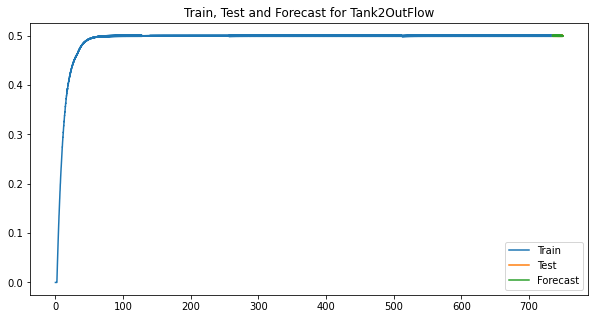

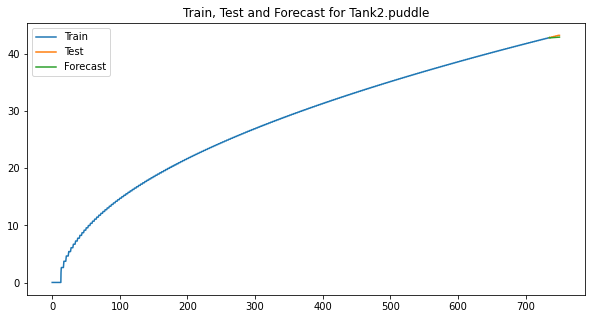

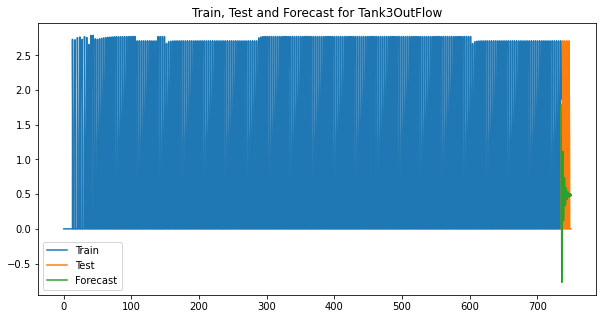

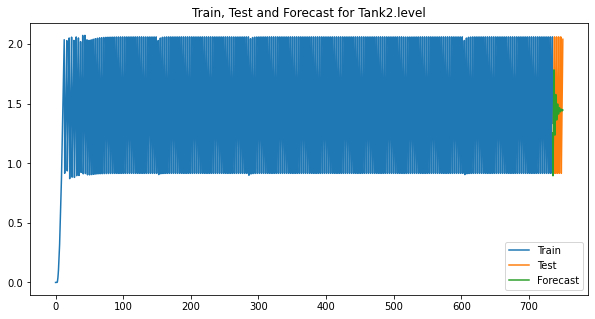

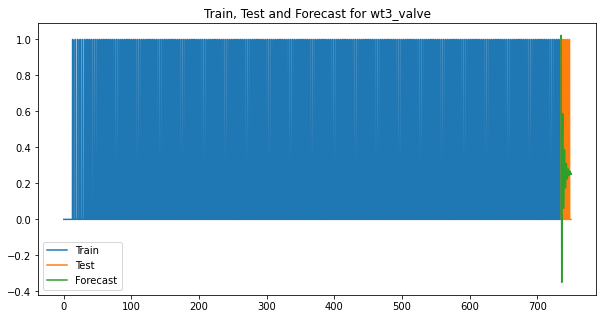

In [38]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.api import VAR
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# # Load and preprocess data
# # file_name = 'phy_cps.csv'
# file_name = 'test_series_reduced.csv'
# # file_name = 'waterTank_Golden_reduced.csv'
# df = pd.read_csv(file_name, index_col=0, parse_dates=True)
# df = df.dropna()
# raw_data = df.values
# scaler = MinMaxScaler()
# data_fit = scaler.fit_transform(raw_data)
# data = pd.DataFrame(data_fit)

# # Split data into training and testing sets
# train_size = int(len(df) * 0.8)
# # train, test = data.iloc[:train_size], data.iloc[train_size:]
# train, test = data[:train_size], data[train_size:]



# # Fit the VAR model
# model = VAR(train)
# # model_fitted = model.fit(maxlags=15, ic='aic')
# model_fitted = model.fit(maxlags=15, ic='aic')

# # Make forecasts
# lag_order = model_fitted.k_ar
# forecast_input = train.values[-lag_order:]
# # forecast_input = train[-lag_order:]
# forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
# forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


# # Evaluate forecasts
# results = {}
# for col in test.columns:
#     mse = mean_squared_error(test[col], forecast_df[col])
#     rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
#     mae = mean_absolute_error(test[col], forecast_df[col])
#     r2score = r2_score(test[col], forecast_df[col])
#     results[col] = rmse
#     print(f'MSE for {col}: {mse}')
#     print(f'RMSE for {col}: {rmse}')
#     print(f'MAE for {col}: {mae}')
#     print(f'R2 Score for {col}: {r2score}\n')

# # Plot results
# for col in test.columns:
#     plt.figure(figsize=(10, 5))
#     # plt.plot(train.index, train[col], label='Train')
#     # plt.plot(test.index, test.iloc[col], label='Test')
#     # plt.plot(forecast_df.index, forecast_df.iloc[col], label='Forecast')
#     plt.plot(train[col], label='Train')
#     plt.plot(test[col], label='Test')
#     plt.plot(forecast_df[col], label='Forecast')
#     plt.title(f'Train, Test and Forecast for {col}')
#     plt.legend()
#     plt.show()



import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
# file_name = 'phy_cps.csv'
# file_name = 'test_series_reduced.csv'
file_name = 'waterTank_Golden_reduced.csv'
data = pd.read_csv(file_name, index_col=0, parse_dates=True)
data = data.dropna()

# Split data into training and testing sets
train_size = int(len(data) * 0.98)
train, test = data.iloc[:train_size], data.iloc[train_size:]
# train, test = data[:train_size], data[train_size:]

# Fit the VAR model
model = VAR(train)
# model_fitted = model.fit(maxlags=15, ic='aic')
model_fitted = model.fit(maxlags=15, ic='aic')

# Make forecasts
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


# Evaluate forecasts
results = {}
for col in test.columns:
    mse = mean_squared_error(test[col], forecast_df[col])
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
    mae = mean_absolute_error(test[col], forecast_df[col])
    r2score = r2_score(test[col], forecast_df[col])
    results[col] = rmse
    print(f'MSE for {col}: {mse}')
    print(f'RMSE for {col}: {rmse}')
    print(f'MAE for {col}: {mae}')
    print(f'R2 Score for {col}: {r2score}\n')

# Plot results
for col in test.columns:
    plt.figure(figsize=(10, 5))
    # plt.plot(train.index, train[col], label='Train')
    # plt.plot(test.index, test.iloc[col], label='Test')
    # plt.plot(forecast_df.index, forecast_df.iloc[col], label='Forecast')
    plt.plot(train[col], label='Train')
    plt.plot(test[col], label='Test')
    plt.plot(forecast_df[col], label='Forecast')
    plt.title(f'Train, Test and Forecast for {col}')
    plt.legend()
    plt.show()


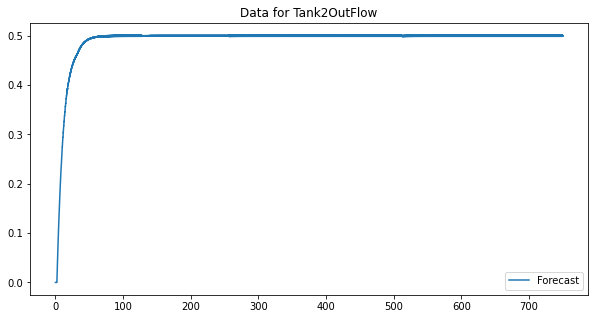

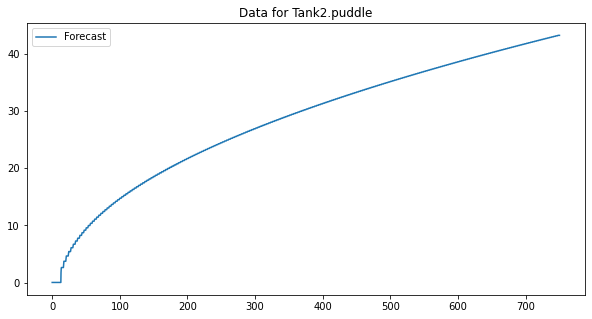

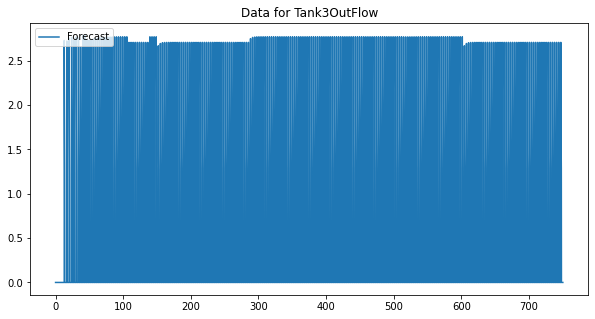

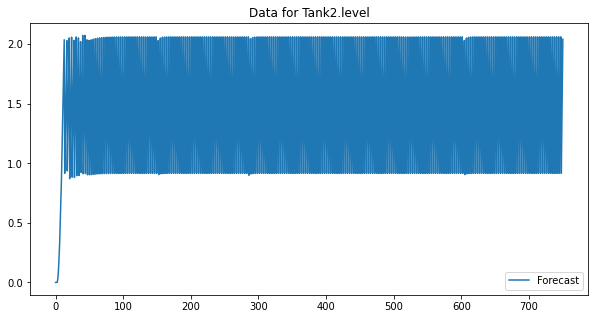

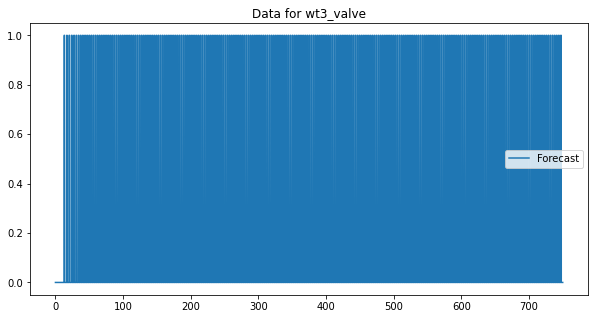

In [39]:
for col in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[col], label='Forecast')
    plt.title(f'Data for {col}')
    plt.legend()
    plt.show()

In [40]:
train_size

14700

In [41]:
data.describe()

,Tank2OutFlow,Tank2.puddle,Tank3OutFlow,Tank2.level,wt3_valve
count,15001.000000,15001.000000,15001.000000,15001.000000,15001.000000
mean,0.491522,28.252089,0.478120,1.444786,0.252450
std,0.048457,10.839790,0.852795,0.359002,0.434432
min,0.000000,0.022568,0.000000,0.000000,0.000000
25%,0.499207,20.937637,0.000000,1.160903,0.000000
50%,0.499715,30.200533,0.000000,1.440757,0.000000
75%,0.500693,37.330880,1.282424,1.741081,1.000000
max,0.501029,43.209799,2.787409,2.073883,1.000000


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE for Tank_1: 0.8903088388014322
RMSE for Tank_1: 0.9435617832455022
MAE for Tank_1: 0.6556870778353501
R2 for Tank_1: -0.45588233560343605

MSE for Tank_2: 1.0670182926053657
RMSE for Tank_2: 1.0329657751374757
MAE for Tank_2: 0.7450019115043299
R2 for Tank_2: -0.01361214514807707

MSE for Tank_3: 0.8162713591335283
RMSE for Tank_3: 0.9034773705708009
MAE for Tank_3: 0.6295991182638003
R2 for Tank_3: -0.06582564717039885

MSE for Pump_1: 1.1121593419895588
RMSE for Pump_1: 1.0545896557379837
MAE for Pump_1: 0.11306114731100689
R2 for Pump_1: -0.001357191754137732

MSE for Pump_2: 1.1633574951317642
RMSE for Pump_2: 1.0785905131845748
MAE for Pump_2: 0.11450392792147239
R2 for Pump_2: 0.01076139910498819

MSE for Flow_sensor: 1.9984394464365167
RMSE for Flow_sensor: 1.4136617157002296
MAE for Flow_sensor: 0.18359844676027412
R2 for Flow_sensor: -0.00014668497191738794



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

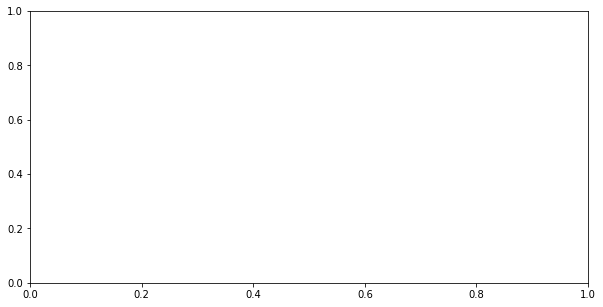

In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
file_name = 'phy_cps.csv'
# file_name = 'waterTank_Golden_reduced.csv'
data = pd.read_csv(file_name, index_col=0, parse_dates=True)
data = data.dropna()

# Function to check for stationarity
def adf_test(series, signif=0.05):
    dftest = adfuller(series, autolag='AIC')
    p_value = dftest[1]
    return p_value <= signif

# Check stationarity and log-transform if needed
for col in data.columns:
    if not adf_test(data[col]):
        print(f'{col} is not stationary. Applying log transformation.')
        data[col] = np.log(data[col])

# Apply differencing to make the series stationary
data_diff = data.diff().dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_diff)
data_scaled = pd.DataFrame(data_scaled, index=data_diff.index, columns=data_diff.columns)

# Split data into training and testing sets
train_size = int(len(data_scaled) * 0.9)
train, test = data_scaled.iloc[:train_size], data_scaled.iloc[train_size:]

# Automatically select the lag order using criteria
model = VAR(train)
lag_order_results = model.select_order(maxlags=15)
selected_lag = lag_order_results.aic

# Fit the model
model_fitted = model.fit(selected_lag)

# Make forecasts
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Evaluate forecasts
results = {}
for col in test.columns:
    actual = test[col].values
    predicted = forecast_df[col].values
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    results[col] = {'RMSE': rmse, 'R2': r2}
    print(f'MSE for {col}: {mse}')
    print(f'RMSE for {col}: {rmse}')
    print(f'MAE for {col}: {mae}')
    print(f'R2 for {col}: {r2}\n')

# Plot results
for col in test.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data_scaled.index, data_scaled[col], label='Actual')
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast')
    plt.title(f'Actual vs Forecast for {col}')
    plt.legend()
    plt.show()


In [55]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.api import VAR
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.stats.stattools import durbin_watson
# from sklearn.preprocessing import StandardScaler

# # Load and preprocess data
# file_name = 'phy_cps.csv'
# # file_name = 'waterTank_Golden_reduced.csv'
# data = pd.read_csv(file_name, index_col=0, parse_dates=True)
# data = data.dropna()

# # Function to check for stationarity
# def adf_test(series, signif=0.05):
#     dftest = adfuller(series, autolag='AIC')
#     p_value = dftest[1]
#     return p_value <= signif

# # Check stationarity and log-transform if needed
# for col in data.columns:
#     if not adf_test(data[col]):
#         print(f'{col} is not stationary. Applying log transformation.')
#         data[col] = np.log(data[col])

# # Apply differencing to make the series stationary
# data_diff = data.diff().dropna()

# # Scale the data
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_diff)
# data_scaled = pd.DataFrame(data_scaled, index=data_diff.index, columns=data_diff.columns)

# # Split data into training and testing sets
# train_size = int(len(data_scaled) * 0.9)
# train, test = data_scaled.iloc[:train_size], data_scaled.iloc[train_size:]

# # Automatically select the lag order using criteria
# model = VAR(train)
# lag_order_results = model.select_order(maxlags=5)
# selected_lag = lag_order_results.aic

# # Fit the model
# model_fitted = model.fit(selected_lag)

# # Make forecasts
# lag_order = model_fitted.k_ar
# forecast_input = train.values[-lag_order:]
# forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
# forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# # Evaluate forecasts
# results = {}
# for col in test.columns:
#     actual = test[col].values
#     predicted = forecast_df[col].values
#     rmse = np.sqrt(mean_squared_error(actual, predicted))
#     r2 = r2_score(actual, predicted)
#     results[col] = {'RMSE': rmse, 'R2': r2}
#     print(f'RMSE for {col}: {rmse}')
#     print(f'R2 for {col}: {r2}')

# # Plot results
# for col in test.columns:
#     plt.figure(figsize=(10, 5))
#     plt.plot(data_scaled.index, data_scaled[col], label='Actual')
#     plt.plot(forecast_df.index, forecast_df[col], label='Forecast')
#     plt.title(f'Actual vs Forecast for {col}')
#     plt.legend()
#     plt.show()
